In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import numpy as np
import scipy

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [11]:
def visualise(setting):
    if setting == "random":
        name = "Random Actions"
    elif setting == "spurious":
        name = "Spurious Correlations"
    elif setting == "expert":
        name = "Expert Demonstrations"
    
    df = pd.read_csv(f"wm2434-swm1590-{setting}.csv")
    df_swm2110 = pd.read_csv(f"swm2110-{setting}.csv")
    df_swm1850 = pd.read_csv(f"swm1850-{setting}.csv")

    wm = df['wm_agent_reward']
    swm1590 = df['swm_agent_reward']
    swm1850 = df_swm1850['swm_agent_reward']
    swm2110 = df_swm2110['swm_agent_reward']
    n = len(wm)

    plot = pd.DataFrame({
        f"{name} Dataset": ['WM\n(Params = 2434)']*n + ['SWM\n(Params = 1590)']*n,
        'Reward': pd.concat([wm, swm1590], ignore_index=True)
    })

    fig1, ax = plt.subplots()
    sns.set_style("whitegrid")
    sns.barplot(x=f"{name} Dataset", y="Reward", data=plot, palette="pastel", errwidth=2)
    change_width(ax, 0.7)
    sns.stripplot(x=f"{name} Dataset", y="Reward", data=plot, color="gray", linewidth=0)
    sns.despine(trim=True, left=True)

    print(f"WM 2434: {wm.mean():.3f}")
    print(f"SWM 1590: {swm1590.mean():.3f}")
    print(f"SWM 1590 Improvement: {swm1590.mean() - wm.mean():.3f}")
    
    plot = pd.DataFrame({
        f"{name} Dataset": ['SWM\n(Params = 1590)']*n + ['SWM\n(Params = 1850)']*n + ['SWM\n(Params = 2110)']*n,
        'Reward': pd.concat([swm1590, swm1850, swm2110], ignore_index=True)
    })
    
    fig2, ax = plt.subplots()
    sns.set_style("whitegrid")
    sns.barplot(x=f"{name} Dataset", y="Reward", data=plot, palette="pastel", errwidth=2)
    change_width(ax, 0.7)
    sns.stripplot(x=f"{name} Dataset", y="Reward", data=plot, color="gray", linewidth=0)
    sns.despine(trim=True, left=True)
    
    print(f"SWM 1850: {swm1850.mean():.3f}")
    print(f"SWM 2110: {swm2110.mean():.3f}")
    return fig1, fig2

WM 2434: 31.529
SWM 1590: 48.054
SWM 1590 Improvement: 16.525
SWM 1850: 50.548
SWM 2110: 50.614


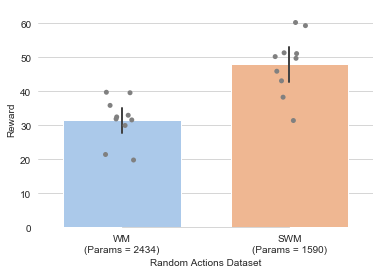

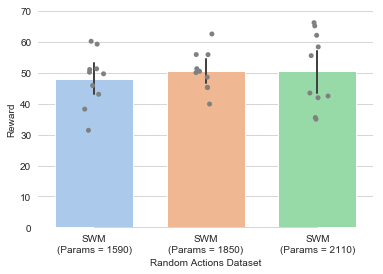

In [12]:
fig1, fig2 = visualise("random")
fig1.savefig("WM-SWM-Random.png")
fig2.savefig("SWM-Random.png")

WM 2434: 30.963
SWM 1590: 45.128
SWM 1590 Improvement: 14.165
SWM 1850: 43.996
SWM 2110: 41.906


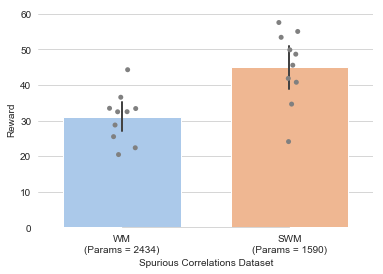

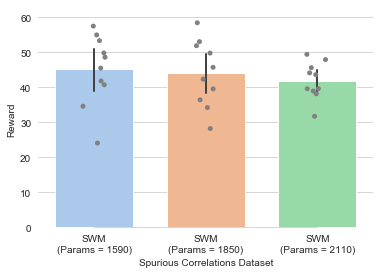

In [4]:
fig1, fig2 = visualise("spurious")
fig1.savefig("WM-SWM-Spurious.png")
fig2.savefig("SWM-Spurious.png")

WM 2434: 18.717
SWM 1590: 20.699
SWM 1590 Improvement: 1.982
SWM 1850: 21.574
SWM 2110: 19.935


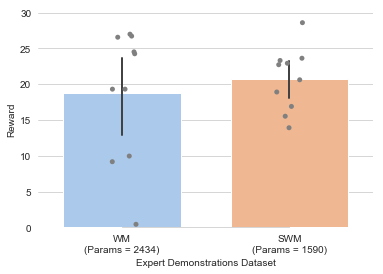

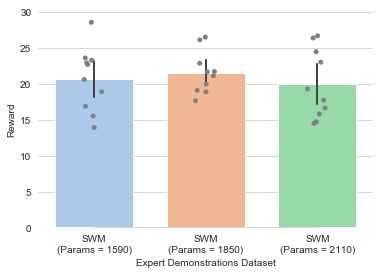

In [5]:
visualise("expert")

In [6]:
random = pd.read_csv(f"../analysis/wm2434-swm1590-random-on-random.csv")
spurious = pd.read_csv(f"../analysis/wm2434-swm1590-spurious-on-random.csv")
expert = pd.read_csv(f"../analysis/wm2434-swm1590-expert-on-random.csv")

In [7]:
df = pd.concat([
    pd.DataFrame({
        'Prediction Steps': np.arange(1, 6),
        'Prediction Loss': random['WM Loss'].loc[:4],
        'Model': "WM",
        'Training Dataset': "Random Actions"}),
    pd.DataFrame({
        'Prediction Steps': np.arange(1, 6),
        'Prediction Loss': spurious['WM Loss'].loc[:4],
        'Model': "WM",
        'Training Dataset': "Spurious Correlations"}),
    pd.DataFrame({
        'Prediction Steps': np.arange(1, 6),
        'Prediction Loss': expert['WM Loss'].loc[:4],
        'Model': "WM",
        'Training Dataset': "Expert Demonstrations"}),
    pd.DataFrame({
        'Prediction Steps': np.arange(1, 6),
        'Prediction Loss': random['SWM Loss'].loc[:4],
        'Model': "SWM",
        'Training Dataset': "Random Actions"}),
    pd.DataFrame({
        'Prediction Steps': np.arange(1, 6),
        'Prediction Loss': spurious['SWM Loss'].loc[:4],
        'Model': "SWM",
        'Training Dataset': "Spurious Correlations"}),
    pd.DataFrame({
        'Prediction Steps': np.arange(1, 6),
        'Prediction Loss': expert['SWM Loss'].loc[:4],
        'Model': "SWM",
        'Training Dataset': "Expert Demonstrations"}),
 ], ignore_index=True)

WM-Random: 0.294, 0.303, 0.314
SWM-Random: 0.045, 0.050, 0.059

WM-Spurious: 0.336, 0.342, 0.350
SWM-Spurious: 0.054, 0.177, 0.714

WM-Expert: 0.212, 0.218, 0.226
SWM-Expert: 0.089, 0.248, 0.383



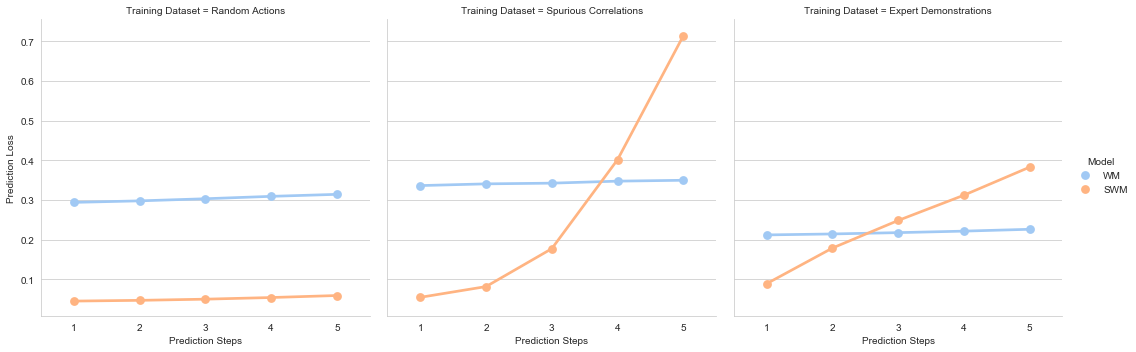

In [30]:
def print_errors(df, setting):
    t1, t3, t5 = [df['WM Loss'][i] for i in [0,2,4]]
    print(f"WM-{setting}: {t1:.3f}, {t3:.3f}, {t5:.3f}")
    t1, t3, t5 = [df['SWM Loss'][i] for i in [0,2,4]]
    print(f"SWM-{setting}: {t1:.3f}, {t3:.3f}, {t5:.3f}\n")
    
print_errors(random, "Random")
print_errors(spurious, "Spurious")
print_errors(expert, "Expert")

sns.catplot(x='Prediction Steps', y='Prediction Loss', hue='Model', col='Training Dataset', palette="pastel", data=df, kind="point")